# Principal Component Analysis

In [ ]:
https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db


In [88]:
import pandas as pd
import numpy as np
#Loading the data
df=pd.read_csv('cars.csv',sep=';',decimal=',')
display(df)

,Country,Car,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
0,U.S.,Buick Estate Wagon,16.9,4.360,2.73,155,350,8
1,U.S.,Ford Country Squire Wagon,15.5,4.054,2.26,142,351,8
2,U.S.,Chevy Malibu Wagon,19.2,3.605,2.56,125,267,8
3,U.S.,Chrysler LeBaron Wagon,18.5,3.940,2.45,150,360,8
4,U.S.,Chevette,30.0,2.155,3.70,68,98,4
5,Japan,Toyota Corona,27.5,2.560,3.05,95,134,4
6,Japan,Datsun 510,27.2,2.300,3.54,97,119,4
7,U.S.,Dodge Omni,30.9,2.230,3.37,75,105,4
8,Germany,Audi 5000,20.3,2.830,3.90,103,131,5
9,Sweden,Volvo 240 GL,17.0,3.140,3.50,125,163,6


In [89]:
df.set_index(['Country','Car'],inplace=True)

###  Pour faire l'analys il faut scandardiser les donnees

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
Z=(scaler.fit(df))

In [92]:
res=scaler.transform(df)

 ### Checking that the data is prepared correctly

In [29]:
import math
M=np.mean(res.round(3),axis=0)
print('The mean of the standerdised variables Xsc \n', M.round(3))
print('Standart deviation of variables Xsc \n', np.std(res,axis=0,ddof=0))

The mean of the standerdised variables Xsc 
 [ 0. -0.  0. -0. -0. -0.]
Standart deviation of variables Xsc 
 [1. 1. 1. 1. 1. 1.]


### Doing the decomposition

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(res)

PCA()

In [42]:
print('Explained variance ratio: ',pca.explained_variance_ratio_)
coude=pca.explained_variance_

Explained variance ratio:  [0.83999614 0.10819696 0.0221887  0.01836637 0.00815936 0.00309248]


### Regle de coude

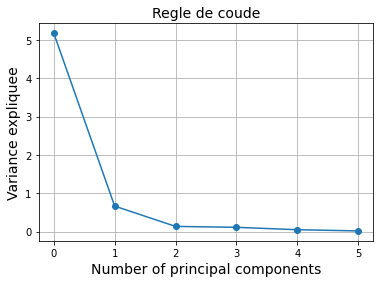

In [43]:
import matplotlib.pyplot as plt
plt.plot(np.arange(6),coude, marker='o')
plt.title('Regle de coude', fontsize=14)
plt.xlabel('Number of principal components', fontsize=14)
plt.ylabel('Variance expliquee', fontsize=14)
plt.grid(True)
plt.show()
None

### Singular values

In [44]:
print(pca.singular_values_)

[13.83904328  4.96678024  2.24922725  2.046346    1.3639407   0.83969387]


In [93]:
print('number of components =',pca.n_components_)

number of components = 6


### Matrice de correlation

In [50]:
M=pd.DataFrame(res) #Matrice de correlation des variables#
M.corr()

,0,1,2,3,4,5
0,1.000000,-0.903071,0.417225,-0.871282,-0.786048,-0.805511
1,-0.903071,1.000000,-0.687880,0.917220,0.950765,0.916678
2,0.417225,-0.687880,1.000000,-0.588906,-0.798273,-0.692150
3,-0.871282,0.917220,-0.588906,1.000000,0.871799,0.863847
4,-0.786048,0.950765,-0.798273,0.871799,1.000000,0.940281
5,-0.805511,0.916678,-0.692150,0.863847,0.940281,1.000000


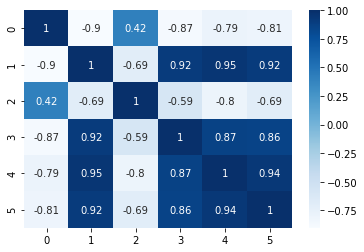

In [76]:
import seaborn as sb
dataplot = sb.heatmap(M.corr(), cmap="Blues", annot=True)
plt.show()

### Valuers propres (diagonalisation):

In [72]:
eig_vals, eig_vecs = np.linalg.eig(M.corr())
eig_vals

array([5.03997681, 0.64918174, 0.01855489, 0.04895616, 0.11019821,
       0.13313219])

In [94]:
print('combien composants a garder (nombre des valuers qui sont > 1) = 1 \n ', eig_vals*((df.shape[0]-1)/df.shape[0]))

combien composants a garder (nombre des valuers qui sont > 1) = 1 
  [4.90734584 0.63209801 0.0180666  0.04766784 0.10729826 0.12962871]


## Valuers propres a partir de singular values

In [75]:
print(pca.singular_values_**2/df.shape[0])

[5.03997681 0.64918174 0.13313219 0.11019821 0.04895616 0.01855489]


In [52]:
Summa=sum(eig_vals)
print('La somee de valeurs propres de la matrice de correlation = ',Summa)

La somee de valeurs propres de la matrice de correlation =  5.999999999999997


### Projection des individus sur les 2 premieres composantes principales

In [58]:
coords=pca.fit_transform(res)

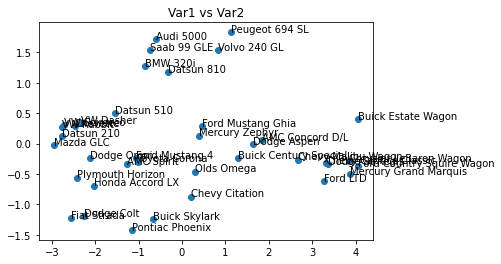

In [116]:
plt.scatter(coords[:,0],coords[:,1])
plt.title('Var1 vs Var2')
for i in range(df.shape[0]):
    plt.annotate(df.index[i][1],(coords[i,0],coords[i,1])) 
None